In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 



In [85]:
df = pd.read_csv('beta.csv')
df.head()


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0


In [65]:
df.tail()


In [4]:
df.corr()

,#,user_rating,critic_rating,platform
#,1.000000,-0.365363,-0.893220,-0.085543
user_rating,-0.365363,1.000000,0.451745,0.074972
critic_rating,-0.893220,0.451745,1.000000,0.028682
platform,-0.085543,0.074972,0.028682,1.000000


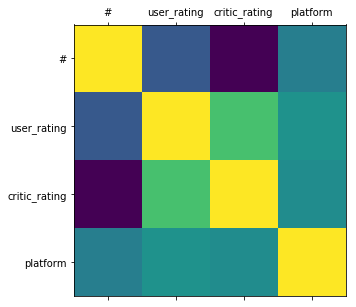

In [56]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (5,5))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

In [6]:
pc = len(df.loc[df['platform'] == 0])
ps4 = len(df.loc[df['platform'] == 1])
switch = len(df.loc[df['platform'] == 2])
xbox = len(df.loc[df['platform'] == 3])


print("PC = {} ".format(pc))
print("Playstation 4  = {} ".format(ps4))
print("Nintendo Switch = {} ".format(switch))
print("Xbox = {} ".format(xbox))
print("Celkový počet hier v datasete = {} ".format(len(df)))



PC = 327 
Playstation 4  = 310 
Nintendo Switch = 364 
Xbox = 186 
Celkový počet hier v datasete = 1187 


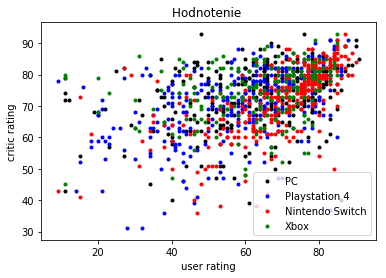

In [15]:
x1 = np.array(df.drop(['title','#'],1))


y1 = np.array(df['platform'], dtype ='float')

y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    print
    if x1[i][2] == 0:
        a = plt.scatter(x1[i][0],x1[i][1], c = 'black', marker = '.')
    elif x1[i][2]== 1:
        b = plt.scatter(x1[i][0],x1[i][1], c = 'blue',marker = '.')
    elif x1[i][2]== 2:
        c = plt.scatter(x1[i][0],x1[i][1], c = 'red',marker = '.')
    elif x1[i][2]== 3:
        d = plt.scatter(x1[i][0],x1[i][1], c = 'green',marker = '.')             
        
    c1+=1



plt.xlabel("user rating")
plt.ylabel("critic rating")
plt.title("Hodnotenie ")
plt.legend((a,b,c,d),('PC','Playstation 4','Nintendo Switch','Xbox'))

plt.show()

In [57]:
x = np.array(df.drop(['platform', 'title','#'],1))
y = np.array(df['platform'], dtype ='float')   
y.shape = (len(y),1)  

In [45]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.9)

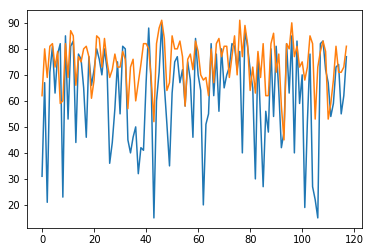

In [46]:
x_f_train = x_train
x_f_test = x_test
y_f_train = y_train
y_f_test = y_test

plt.plot(x_f_train)

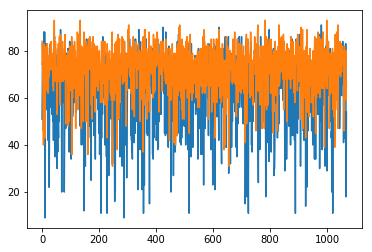

In [47]:
plt.plot(x_f_test)

In [288]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation = tf.nn.sigmoid))


model.compile(optimizer = tf.optimizers.Adagrad(),
       loss = 'binary_crossentropy',
       metrics=['accuracy'])

In [291]:
scores = model.fit(x_f_train, y_f_train, batch_size=100, epochs=10, validation_split=0.2)


Train on 94 samples, validate on 24 samples
Epoch 1/10
94/94 [==============================] - 0s 219us/sample - loss: -6.4694 - accuracy: 0.3298 - val_loss: -4.4324 - val_accuracy: 0.2083
Epoch 2/10
94/94 [==============================] - 0s 68us/sample - loss: -6.4843 - accuracy: 0.3298 - val_loss: -4.4342 - val_accuracy: 0.2083
Epoch 3/10
94/94 [==============================] - 0s 277us/sample - loss: -6.5053 - accuracy: 0.3298 - val_loss: -4.4400 - val_accuracy: 0.2083
Epoch 4/10
94/94 [==============================] - 0s 102us/sample - loss: -6.5295 - accuracy: 0.3298 - val_loss: -4.4476 - val_accuracy: 0.2083
Epoch 5/10
94/94 [==============================] - 0s 116us/sample - loss: -6.5503 - accuracy: 0.3298 - val_loss: -4.4434 - val_accuracy: 0.2083
Epoch 6/10
94/94 [==============================] - 0s 214us/sample - loss: -6.5647 - accuracy: 0.3298 - val_loss: -4.4604 - val_accuracy: 0.2083
Epoch 7/10
94/94 [==============================] - 0s 168us/sample - loss: -6.57

In [239]:
print("Presnosť trénovania: %.2f%% / Validácia trénovania presnosti: %.2f%% / Strata trénovania: %.2f%% / Validácia straty %.2f%% "  %
      (100*scores.history['accuracy'][-1], 100*scores.history['val_accuracy'][-1], 100*scores.history['loss'][-1], 100*scores.history['val_loss'][-1]))

Presnosť trénovania: 32.98% / Validácia trénovania presnosti: 20.83% / Strata trénovania: -570.63% / Validácia straty -405.90% 


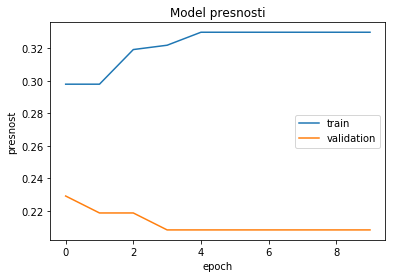

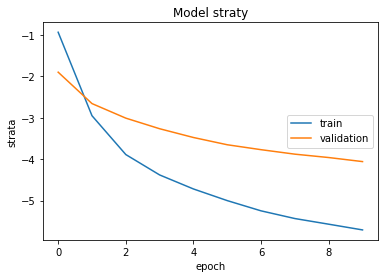

In [240]:
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()


### Model 2


In [94]:
train = df.loc[:,['critic_rating']].values

In [95]:
train

array([[93],
       [93],
       [91],
       ...,
       [48],
       [47],
       [45]])

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        ],
       [1.        ],
       [0.96774194],
       ...,
       [0.27419355],
       [0.25806452],
       [0.22580645]])

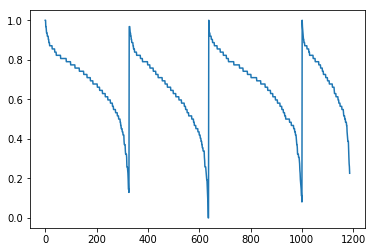

In [97]:
plt.plot(train_scaled)

In [98]:
X_train = []
y_train = []
timesteps = 1
for i in range(timesteps, 1187):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [99]:


# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train



array([[[1.        ]],

       [[1.        ]],

       [[0.96774194]],

       ...,

       [[0.30645161]],

       [[0.27419355]],

       [[0.25806452]]])

In [100]:


y_train



array([1.        , 0.96774194, 0.96774194, ..., 0.27419355, 0.25806452,
       0.22580645])

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [102]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 25)

Epoch 1/25
1186/1186 [==============================] - 12s 10ms/step - loss: 0.0844
Epoch 2/25
1186/1186 [==============================] - 1s 595us/step - loss: 0.0266
Epoch 3/25
1186/1186 [==============================] - 1s 610us/step - loss: 0.0239
Epoch 4/25
1186/1186 [==============================] - 1s 647us/step - loss: 0.0184
Epoch 5/25
1186/1186 [==============================] - 1s 672us/step - loss: 0.0163
Epoch 6/25
1186/1186 [==============================] - 1s 556us/step - loss: 0.0149
Epoch 7/25
1186/1186 [==============================] - 1s 525us/step - loss: 0.0129
Epoch 8/25
1186/1186 [==============================] - 1s 709us/step - loss: 0.0111
Epoch 9/25
1186/1186 [==============================] - 1s 672us/step - loss: 0.0101
Epoch 10/25
1186/1186 [==============================] - 1s 885us/step - loss: 0.0090
Epoch 11/25
1186/1186 [==============================] - 1s 668us/step - loss: 0.0087
Epoch 12/25
1186/1186 [==============================] - 1s 628

## Model 3

In [105]:
COLUMN_NAMES = ['#','title','user_rating','critic_rating','platform']

In [106]:
training_dataset = pd.read_csv('beta.csv', names = COLUMN_NAMES, header=0)
training_dataset


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0
5,5,resident evil 2,90.0,89,0
6,6,devil may cry 5,87.0,89,0
7,7,slay the spire,69.0,89,0
8,8,asgard's wrath,84.0,88,0
9,9,sekiro: shadows die twice,78.0,88,0


In [176]:
train_x = training_dataset.iloc[:,2:4].values
train_y = training_dataset.iloc[:,4].values


In [177]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [178]:
kategoricka_premenna = np_utils.to_categorical(train_y)

In [179]:
kategoricka_premenna

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [279]:
model = Sequential()
model.add(Dense(300, input_dim=2, activation='sigmoid'))
model.add(Dense(300,activation='sigmoid'))
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [299]:
scores = model.fit(train_x, kategoricka_premenna, epochs = 25, validation_split=0.2)

Train on 949 samples, validate on 238 samples
Epoch 1/25
949/949 [==============================] - 0s 262us/sample - loss: 0.4527 - accuracy: 0.7521 - val_loss: 1.7519 - val_accuracy: 0.7237
Epoch 2/25
949/949 [==============================] - 0s 249us/sample - loss: 0.4525 - accuracy: 0.7542 - val_loss: 1.7678 - val_accuracy: 0.7027
Epoch 3/25
949/949 [==============================] - 0s 255us/sample - loss: 0.4520 - accuracy: 0.7568 - val_loss: 1.7829 - val_accuracy: 0.7027
Epoch 4/25
949/949 [==============================] - 0s 246us/sample - loss: 0.4528 - accuracy: 0.7511 - val_loss: 1.7790 - val_accuracy: 0.7048
Epoch 5/25
949/949 [==============================] - 0s 216us/sample - loss: 0.4510 - accuracy: 0.7566 - val_loss: 1.8035 - val_accuracy: 0.6859
Epoch 6/25
949/949 [==============================] - 0s 247us/sample - loss: 0.4518 - accuracy: 0.7540 - val_loss: 1.8002 - val_accuracy: 0.7080
Epoch 7/25
949/949 [==============================] - 0s 251us/sample - loss: 

In [300]:
 model.evaluate(train_x, kategoricka_premenna)

1187/1187 [==============================] - 0s 84us/sample - loss: 0.7461 - accuracy: 0.7437


[0.7461368328599038, 0.74368155]

In [302]:
print("Presnosť trénovania: %.2f%% / Validácia trénovania presnosti: %.2f%% / Strata trénovania: %.2f%% / Validácia straty %.2f%% "  %
      (100*scores.history['accuracy'][-1], 100*scores.history['val_accuracy'][-1], 100*scores.history['loss'][-1], 100*scores.history['val_loss'][-1]))

Presnosť trénovania: 76.50% / Validácia trénovania presnosti: 70.17% / Strata trénovania: 44.87% / Validácia straty 192.29% 


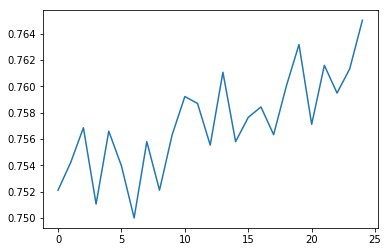

In [304]:
plt.plot(scores.history['accuracy'])

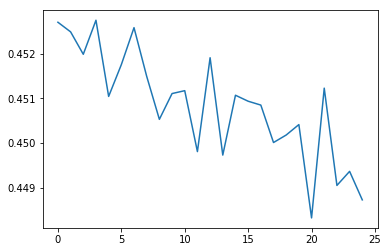

In [305]:
plt.plot(scores.history['loss'])

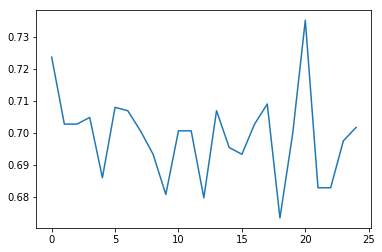

In [306]:
plt.plot(scores.history['val_accuracy'])

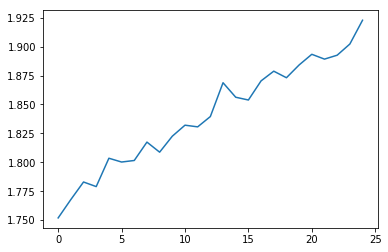

In [307]:
plt.plot(scores.history['val_loss'])